# **Computation on Arrays: Broadcasting**

Another means of vectorizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

In [1]:
import numpy as np

# Introducing Broadcasting

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Scalar Addition

In [3]:
a + 5 # print(np.arange(3) + 5)

array([5, 6, 7])

 extend this to arrays of higher dimension

Here the **one-dimensional array a is stretched, or broadcast** across the second dimension in order to match the shape of M.

In [4]:
M = np.ones((3, 3))
print(M)
print(M + a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


**broadcasting of both arrays**

In [5]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
print(a + b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


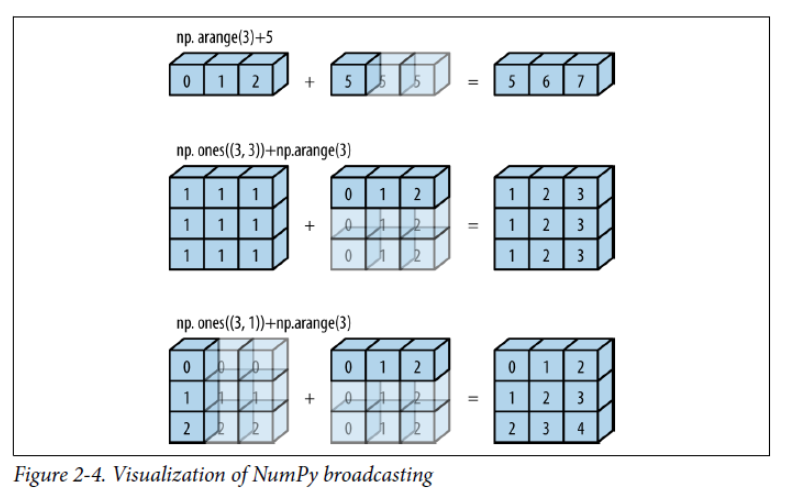

**Rules of Broadcasting**

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

**Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
**Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
**Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.
To make these rules clear, let's consider a few examples in detail.

**Broadcasting example 1**

Let's look at adding a two-dimensional array to a one-dimensional array:

In [6]:
M = np.ones((3, 3))
a = np.arange(3)
print(M)
print(a)
print(M + a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


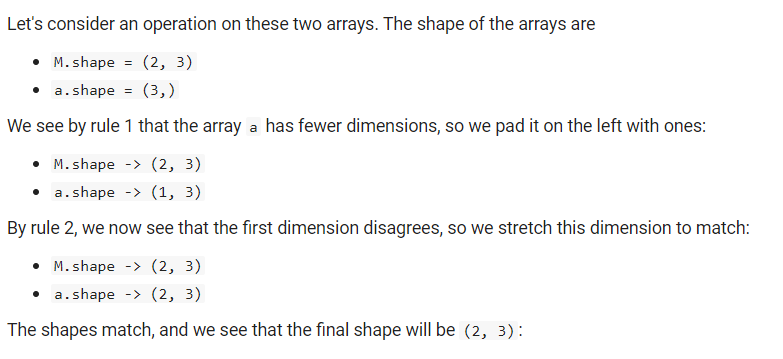

In [7]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

**Broadcasting example 2**

Let's take a look at an example where both arrays need to be broadcast:

In [8]:
a = np.arange(3).reshape((3, 1)) # np.arange(3)[:, np.newaxis]
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [9]:
a.shape, b.shape

((3, 1), (3,))

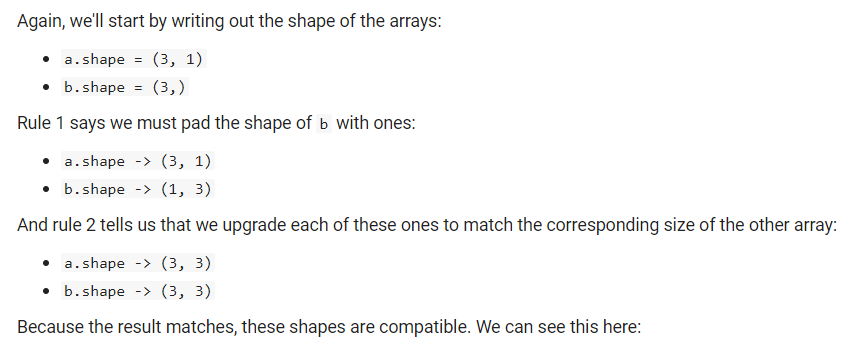

In [10]:
a + b # rule 2 is applied to both the arrays

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

**Broadcasting example 3**

Now let's take a look at an example in which the two arrays are not compatible:

In [11]:
M = np.ones((3, 2))
a = np.arange(3)
print(M, a, sep='\n')

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


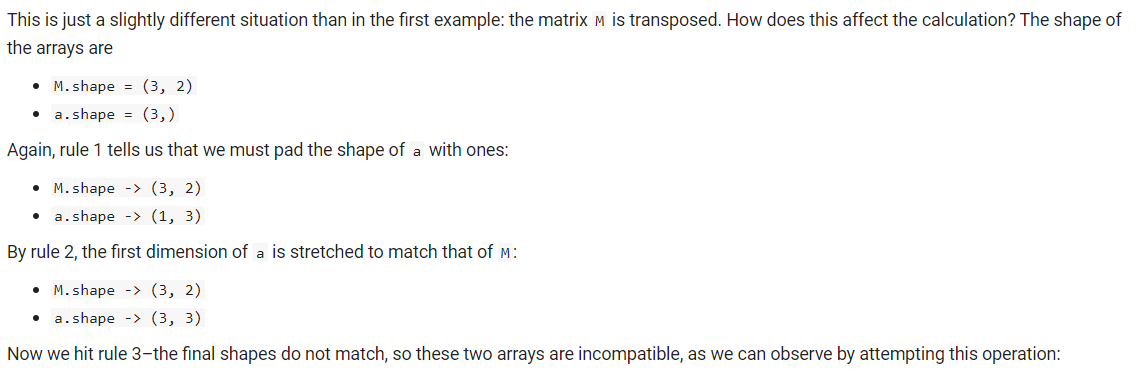

In [12]:
M + a # error

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the np.newaxis keyword)

In [13]:
a[:, np.newaxis].shape

(3, 1)

In [14]:
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [15]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

log(exp(M) + exp(a))

In [16]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

**Centering an array**

One commonly seen example is when centering an array of data. Imagine you have an array of 10 observations, each of which consists of 3 values, we'll store this in a  10×3  array:

In [17]:
X = np.random.random((10, 3))
X

array([[0.72991312, 0.78946199, 0.45499875],
       [0.07396782, 0.81044452, 0.1938409 ],
       [0.89088873, 0.06779061, 0.4633912 ],
       [0.21572367, 0.06951505, 0.43792341],
       [0.39680461, 0.35375053, 0.90803847],
       [0.58004957, 0.0462848 , 0.3517316 ],
       [0.98157622, 0.14920148, 0.59121566],
       [0.16728302, 0.40905894, 0.75439209],
       [0.66357916, 0.37144137, 0.05674956],
       [0.22510876, 0.8661198 , 0.59051561]])

We can compute the mean of each feature using the mean aggregate across the first dimension:

In [18]:
print(X.ndim, X.shape) # here 3 is considered the first dimension and 10 is the 2nd dimension and goes on
Xmean = X.mean(0)
print(Xmean)

2 (10, 3)
[0.49248947 0.39330691 0.48027973]


And now we can center the X array by subtracting the mean (this is a broadcasting operation):

In [19]:
Xcentered = X - Xmean
Xcentered

array([[ 0.23742365,  0.39615508, -0.02528097],
       [-0.41852165,  0.41713761, -0.28643882],
       [ 0.39839926, -0.3255163 , -0.01688853],
       [-0.27676579, -0.32379186, -0.04235632],
       [-0.09568486, -0.03955638,  0.42775874],
       [ 0.0875601 , -0.34702211, -0.12854813],
       [ 0.48908676, -0.24410543,  0.11093594],
       [-0.32520645,  0.01575203,  0.27411236],
       [ 0.17108969, -0.02186554, -0.42353016],
       [-0.26738071,  0.47281289,  0.11023589]])

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [20]:
Xcentered.mean(0) # to within machine precision, this means zero

array([0.00000000e+00, 0.00000000e+00, 1.11022302e-17])

# **Comparisons, Masks, and Boolean Logic**

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

# Comparison Operators as ufuncs

In Computation on NumPy Arrays: Universal Functions we introduced ufuncs, and focused in particular on arithmetic operators. We saw that using +, -, *, /, and others on arrays leads to element-wise operations. NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. All six of the standard comparison operations are available:

In [21]:
x = np.array([1, 2, 3, 4, 5])

In [22]:
x < 3 # less than

array([ True,  True, False, False, False])

In [23]:
x > 3 # greater than

array([False, False, False,  True,  True])

In [24]:
x <= 3 # less than or equal

array([ True,  True,  True, False, False])

In [25]:
x >= 3 # greater than or equal

array([False, False,  True,  True,  True])

In [26]:
x != 3 # not equal

array([ True,  True, False,  True,  True])

In [27]:
x == 3 # equal

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [28]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write x < 3, internally NumPy uses np.less(x, 3). A summary of the comparison operators and their equivalent ufunc is shown here:

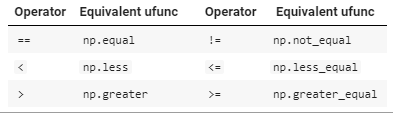

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape. Here is a two-dimensional example:

In [29]:
rand = np.random.RandomState(0)
x = rand.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [31]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

**Working with Boolean Arrays**

Given a Boolean array, there are a host of useful operations you can do. We'll work with x, the two-dimensional array we created earlier.

**Counting entries**

In [32]:
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than 6. Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:

In [33]:
np.sum(x < 6)

8

The benefit of sum() is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [34]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) np.any or np.all:

In [36]:
np.any(x > 8)

True

In [37]:
np.any(x < 0)

False

In [38]:
np.all(x < 10)

True

In [39]:
np.all(x == 6)

False

np.all and np.any can be used along particular axes as well. For example:

In [40]:
np.all(x < 8, axis=1)

array([ True, False,  True])

Here all the elements in the first and third rows are less than 8, while this is not the case for the second row.

**Boolean operators**
NumPy Supports bitwise logic operators, &, |, ^, and ~.

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

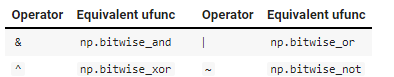

**Boolean Arrays as Masks**

In the preceding section we looked at aggregates computed directly on Boolean arrays. A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. Returning to our x array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [41]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [42]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:

In [43]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is True.

# **Fancy Indexing**

In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., arr[0]), slices (e.g., arr[:5]), and Boolean masks (e.g., arr[arr > 0]). In this section, we'll look at another style of array indexing, known as fancy indexing. Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values.

**Exploring Fancy Indexing**

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [44]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

Suppose we want to access three different elements. We could do it like this:

In [45]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [46]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [47]:
ind = np.array([[3, 7], 
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [48]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [49]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is X[0, 2], the second is X[1, 1], and the third is X[2, 3]. So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [50]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [51]:
col

array([2, 1, 3])

In [53]:
x[:, np.newaxis]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [54]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

Here, each row value is matched with each column vector, exactly as we saw in
broadcasting of arithmetic operations. For example:

In [55]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with fancy indexing that the return value reflects the
broadcasted shape of the indices, rather than the shape of the array being indexed.

**Combined Indexing**

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

We can combine fancy and simple indices:

In [56]:
x[2, [2, 0, 1]]

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [57]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [58]:
x[:, np.newaxis]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

**And we can combine fancy indexing with masking:**

In [59]:
mask = np.array([1, 0, 1, 0], dtype=bool)
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

**Modifying Values with Fancy Indexing**

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [60]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [64]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [66]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.